## Ejercicios de pair programming 18 enero: Intro ML

### **Lección 1: Intro Machine Learning**

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

### Objetivos

Los objetivos de hoy son:

#### 1. Buscar un conjunto de datos a analizar:
- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.



Hemos descargado un conjunto de csv que miden el ranking de felicidad de diferentes ciudades de 2015 a 2019. Contiene 2 variables categoricas y 9 numericas. Abriremos los 5 csv para poder explorarlos

In [1]:
# importamos las librerias que nos hacen falta
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#vamos abriendo los csv
df15 = pd.read_csv("archive/2015.csv", index_col = 0)
df15.head(2)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [7]:
df15.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [8]:
df16 = pd.read_csv("archive/2016.csv", index_col = 0)
df16.head(2)

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [9]:
df16.columns   #lower confidence y upper confidence son dos columnas que no hay en 2015

Index(['Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [25]:
df15.drop('Standard Error',  axis = 1, inplace = True)  #borramos la columna Standar Error para poder hacer concat de 2015 y 2016

In [16]:
df16.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis = 1, inplace = True) #borramos la columna lower confidence y upper confidence para poder hacer concat de 2015 y 2016

In [18]:
df16.columns

Index(['Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [19]:
df15.reset_index(inplace = True)  #reseteamos el index de 2015

In [20]:
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [21]:
df16.reset_index(inplace = True)  #reseteamos el index de 2016
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [26]:
df15.shape

(158, 11)

In [27]:
df16.shape    #ya tenemos las mismas columnas en los dos df

(157, 11)

In [10]:
df17 = pd.read_csv("archive/2017.csv", index_col = 0)  #seguimos explorando csv para comprobar su contenido
df17.head(2)

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Country,,,,,,,,,,,
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [11]:
df17.columns

Index(['Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')

In [12]:
df18 = pd.read_csv("archive/2018.csv", index_col = 0)   #seguimos explorando csv para comprobar su contenido
df18.head(2)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [13]:
df18.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [14]:
df19 = pd.read_csv("archive/2019.csv", index_col = 0)   #seguimos explorando csv para comprobar su contenido
df19.head(2)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [15]:
df19.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [28]:
df_unido = pd.concat([df15, df16] , axis = 0 , ignore_index= True)    #hacemos concat de 2015 y 2016 para poder tener mas datos a analizar

In [34]:
df_unido.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [30]:
df_unido.shape   #ya tenemos las filas de cada df sumadas

(315, 11)

#### 2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
  
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

## Descripcion de las columnas de nuestro df

- Country: nombre del pais

- Region: region a la que pertenece el pais

- Happiness Rank: Ranking por pais basado en el hapiness score

- Happiness Score: Metrica calculada preguntando a personas al azar poniendo nota a su felicidad

- Economy (GDP per Capita): la medidda en que el IPC contribuye al calculo de la puntuacion de felicidad

- Family: la medidda en que la familia contribuye al calculo de la puntuacion de felicidad

- Health (Life Expectancy): la medidda en que la esperanza de vida contribuye al calculo de la puntuacion de felicidad 

- Freedom: la medidda en que la libertad contribuye al calculo de la puntuacion de felicidad 

- Trust (Goverment Corruption): la medidda en que la percepcion de la corrupcion contribuye al calculo de la puntuacion de felicidad 

- Generosity: la medidda en que la generosidad contribuye al calculo de la puntuacion de felicidad 

- Dystopia Residual: la medidda en que la distopia residual contribuye al calculo de la puntuacion de felicidad. (fuente: https://www.reddit.com/r/explainlikeimfive/comments/jdai5y/eli5_what_does_dystopian_residual_mean/)

## EDA df_unido

In [35]:
df_unido.shape

(315, 11)

In [36]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        315 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    int64  
 3   Happiness Score                315 non-null    float64
 4   Economy (GDP per Capita)       315 non-null    float64
 5   Family                         315 non-null    float64
 6   Health (Life Expectancy)       315 non-null    float64
 7   Freedom                        315 non-null    float64
 8   Trust (Government Corruption)  315 non-null    float64
 9   Generosity                     315 non-null    float64
 10  Dystopia Residual              315 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 27.2+ KB


In [37]:
df_unido.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [39]:
df_unido.describe().T   #datos estadisticos de las columnas numericas

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,315.0,79.238095,45.538922,1.00000,40.000000,79.00000,118.50000,158.00000
Happiness Score,315.0,5.378949,1.141531,2.83900,4.510000,5.28600,6.26900,7.58700
Economy (GDP per Capita),315.0,0.899837,0.410780,0.00000,0.594900,0.97306,1.22900,1.82427
Family,315.0,0.892647,0.286718,0.00000,0.739880,0.93793,1.08736,1.40223
Health (Life Expectancy),315.0,0.594054,0.240790,0.00000,0.419645,0.64045,0.78764,1.02525
Freedom,315.0,0.399896,0.150684,0.00000,0.295890,0.41319,0.51673,0.66973
Trust (Government Corruption),315.0,0.140532,0.115490,0.00000,0.061315,0.10613,0.17861,0.55191
Generosity,315.0,0.239957,0.130077,0.00000,0.151430,0.21854,0.31145,0.81971
Dystopia Residual,315.0,2.212032,0.558728,0.32858,1.884135,2.21126,2.56347,3.83772


In [40]:
df_unido.describe(include= "object").T   #datos estadisticos de las columnas categoricas

,count,unique,top,freq
Country,315,164,Switzerland,2
Region,315,10,Sub-Saharan Africa,78


In [41]:
df_unido.isnull().sum()  #suma de valores nulos de nuestro df(no tenemos)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [42]:
df_unido.duplicated().sum()   #suma de valores duplicados en nuestro df(no tenemos)

0

In [44]:
numericas = df_unido.select_dtypes(include=["int64", "float64"])  #separamos las variables numericas
numericas.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Sacamos los outliers visualmente con boxplot

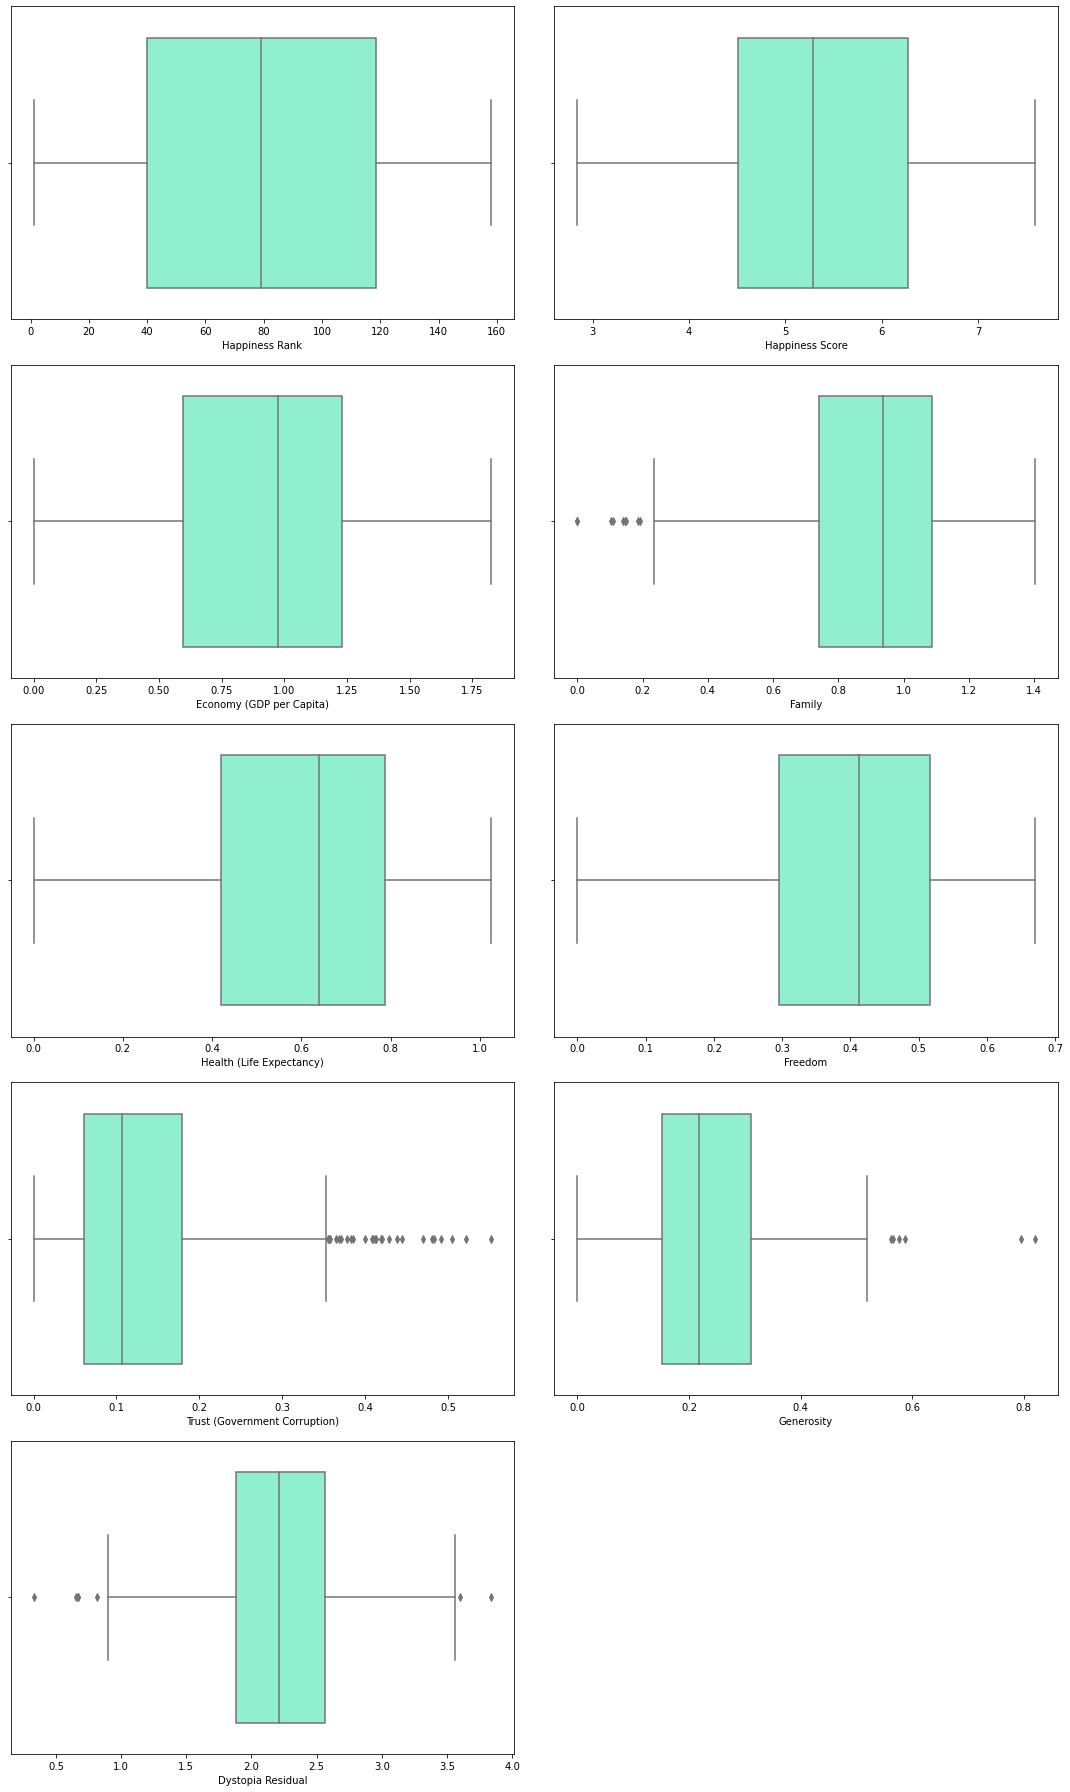

In [46]:
fig, axes = plt.subplots(5, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = numericas, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

# Sacamos los indices de los valores outliers

In [47]:
lista_columnas = numericas.columns   #sacamos en una variable cuales son los nombres de las columnas numericas

In [48]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(numericas[col], 25)
        Q3 = np.nanpercentile(numericas[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [51]:
indices= detectar_outliers(lista_columnas, df_unido)   #aplicamos la funcion y sacamos una variable llamada indices con los numeros de los indices donde estan localizados los outliers
indices

{'Family': [147, 157, 283, 289, 300, 310, 311, 312, 313],
 'Trust (Government Corruption)': [0,
  2,
  3,
  5,
  7,
  8,
  9,
  16,
  19,
  23,
  27,
  71,
  90,
  129,
  153,
  158,
  159,
  161,
  162,
  165,
  167,
  179,
  185,
  193,
  254,
  309],
 'Generosity': [33, 128, 187, 190, 236, 276],
 'Dystopia Residual': [13, 71, 131, 153, 155, 233, 313]}

In [52]:
indices.keys()   #sacamos el nombre de las columnas donde hay outliers

dict_keys(['Family', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])